Load up the sympy python package to do symbolic mathematics

In [1]:
from IPython.display import display

from sympy.interactive import printing
printing.init_printing(use_latex=True)

from __future__ import division
import sympy as sym
from sympy import *


%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'serif','size'   : 12})

# Several constants

In [2]:
from __future__ import division, print_function, unicode_literals

# Basic constants
pi = 3.1415926
c = 299792458
h = 6.62606957e-34
hbar = h / 2 / pi
k_B = 1.3806488e-23
m_e = 9.10938291e-31
m_p = 1.672621898e-27
mu_0 = 4e-7 * pi
epsilon_0 = 1 / c**2 / mu_0
E = 1.602176565e-19
N_A = 6.02214129e+23


# Mass of Sr-88, Sr-87, Sr-86, Sr-84
M88 = 1.459706905272492E-25  
M87 = 1.4431557366419E-25  
M86 = 1.42655671117996E-25
M84 = 1.3934150821E-25
M = M88

# Optical tweezer potential

Need polarizibility

Try to write it as a class

In [3]:
def Gaussian_3d(I_0, w_0, z_R, x, y, z, x_0, y_0, z_0):
    w_z = w_0 * sqrt (1 + ((z - z_0) / z_R) ** 2)
    I = I_0 * (w_0 / w_z) ** 2 * exp(-2 * (sqrt ((x - x_0)**2 + (y - y_0)**2) / w_z) ** 2)
    return I

(-10, 10)

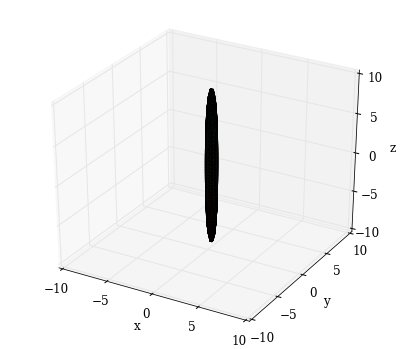

In [4]:
# Plot the isosurface of potential energy
# Note the spacing and offset in marching_cubes function

import numpy as np
from numpy import exp, sqrt
from skimage import measure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x, y, z = np.mgrid[-10:10:100j, -10:10:100j, -10:10:100j]
vol = Gaussian_3d(1, 1, 10, x, y, z, 0, 1, 0)
verts, faces = measure.marching_cubes(vol, 0.5, spacing=(20/100, 20/100, 20/100))

fig = plt.figure(figsize = (7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0]-10, verts[:,1]-10, faces, verts[:, 2]-10,
                cmap='Spectral', lw=1)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim(-10, 10) 
ax.set_ylim(-10, 10)  
ax.set_zlim(-10, 10)


In [5]:
def tweezer_3d(I_0, w_0, z_R, r, z):
    w_z = w_0 * sqrt (1 + (z / z_R) ** 2)
    I = I_0 - I_0 * (w_0 / w_z) ** 2 * exp(-2 * ( r / w_z) ** 2)
    return I

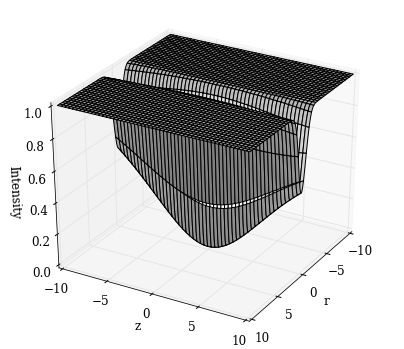

In [6]:
import numpy as np
from numpy import exp, sqrt
import matplotlib.pyplot as plt

r, z = np.mgrid[-10:10:500j, -10:10:500j]
#r = 10
#y = sqrt(r ** 2 - x ** 2)
#vol = Gaussian_3d(1, 1, 10, x, y, z, 0, 0, 0)
vol = tweezer_3d(1, 1, 10, r, z)

fig = plt.figure(figsize = (7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(r ,z, vol, color = 'white')

#view orientation
ax.elev = 30 #30 degrees for a typical isometric view
ax.azim = 30

ax.set_xlabel("r")
ax.set_ylabel("z")
ax.set_zlabel("Intensity")

(-10, 10)

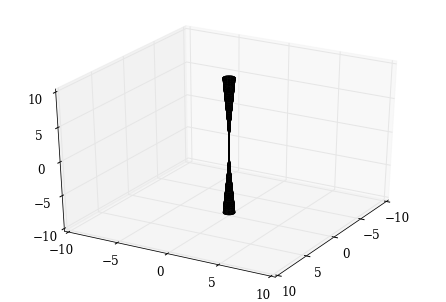

In [7]:
# Plot tweezers in the typical way

import numpy as np
from numpy import exp, sqrt
import matplotlib.pyplot as plt

r = 0
z = np.linspace(-10, 10, 600)
revolve_steps = np.linspace(0, np.pi*2, 600).reshape(1,600)
rho = tweezer_3d(1, 1, 10, r, z)

theta = revolve_steps
#convert rho to a column vector
rho_column = rho.reshape(600,1)
x = rho_column.dot(np.cos(theta))
y = rho_column.dot(np.sin(theta))
# expand z into a 2d array that matches dimensions of x and y arrays..
# i used np.meshgrid
zs, rs = np.meshgrid(z, rho)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
fig.tight_layout(pad = 0.0)
#transpose zs or you get a helix not a revolve.
# you could add rstride = int or cstride = int kwargs to control the mesh density
ax.plot_surface(x, y, zs.T, color = 'white', shade = False)

#view orientation
ax.elev = 30 #30 degrees for a typical isometric view
ax.azim = 30

ax.set_xlim(-10, 10) 
ax.set_ylim(-10, 10)  
ax.set_zlim(-10, 10)

(-10, 10)

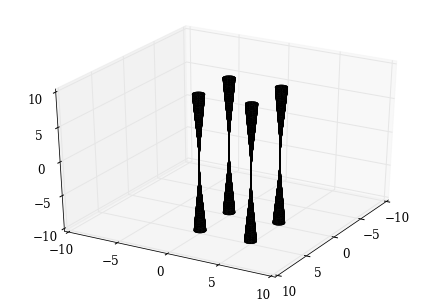

In [8]:
# Plot tweezer arrays

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
fig.tight_layout(pad = 0.0)
#transpose zs or you get a helix not a revolve.
# you could add rstride = int or cstride = int kwargs to control the mesh density
ax.plot_surface(x, y, zs.T, color = 'white', shade = False)
ax.plot_surface(x + 5, y, zs.T, color = 'white', shade = False)
ax.plot_surface(x, y + 5, zs.T, color = 'white', shade = False)
ax.plot_surface(x + 5, y + 5, zs.T, color = 'white', shade = False)

#view orientation
ax.elev = 30 #30 degrees for a typical isometric view
ax.azim = 30

ax.set_xlim(-10, 10) 
ax.set_ylim(-10, 10)  
ax.set_zlim(-10, 10)

In [9]:
#from __future__ import division, print_function, unicode_literals


def omega_light(lamb):
    return 2 * pi * c / lamb

#def hertz_to_temp
      
class ODT:
    def __init__(self, P, lamb, w0, alpha, m_a = M):
        self.__P = P                       # Total power of the beam
        self.__lamb = lamb                 # Light wavelength
        self.__omega = omega_light(lamb)   # Light wavevector
        self.__m_a = m_a                   # Atomic mass
        self.__w0 = w0                     # Beam waist
        self.__alpha = alpha               # Polarizability
        
    def w0(self):
        return self.__w0
        
    def rayleigh_range(self):
        return self.__w0**2 * pi / self.__lamb
    
    # Center intensity for gaussian beam
    def I0(self):
        return 2 * self.__P / pi / self.__w0**2
    
    # Lattice depth, should be real part of alpha 
    def stark_shift(self):
        return 1 * self.__alpha * self.I0() / 2 / c / epsilon_0
    
    def depth(self):
        return self.stark_shift()

    def depth_f(self):
        return self.depth() / h
    
    def depth_omega(self):
        return self.depth() / hbar
    
    def trap_omega_l(self):
        return sqrt(abs(2 * self.depth() / self.__m_a)) / self.rayleigh_range()
    
    def trap_omega_r(self):
        return 2 * sqrt(abs(self.depth() / self.__m_a)) / self.__w0
    
    def trap_freq_l(self):
        return self.trap_omega_l() / 2 / pi
    
    def trap_freq_r(self):
        return self.trap_omega_r() / 2 / pi
    
    def z0_l(self):
        return sqrt(hbar / self.__m_a / self.trap_omega_l())
    
    def z0_r(self):
        return sqrt(hbar / self.__m_a / self.trap_omega_r())
    
    # Lamb-Dicke parameters
    def eta_l(self):
        return 2 * pi / self.__lamb * self.z0_l() / sqrt(2)
    
    def eta_r(self):
        return 2 * pi / self.__lamb * self.z0_r() / sqrt(2)
    
    def nmax_r(self):
        return abs(self.depth_f()) / self.trap_freq_r()
    
    def nmax_l(self):
        return abs(self.depth_f()) / self.trap_freq_l()
    

In [10]:
tuneout_g = ODT(2e-4, 632.9e-9, 500e-9, 0.0669e-37, M87)
tuneout_e = ODT(2e-3, 689.2e-9, 500e-9, 0.2553e-37, M87)
print(tuneout_g.trap_freq_r())
print(tuneout_g.trap_freq_r()/tuneout_g.trap_freq_l())

42454.3239858
3.5099406402


# Ground states in the harmonic approximation

In [11]:
from sympy.physics.qho_1d import psi_n
from sympy import var

# Substition funtion in Sympy
# Actually all the parameters they don't depend on the other two axis
# They are all ground states
def HO_3d_g(x, y, z):
    var("X Y Z omega_r omega_l")
    psi = psi_n(0, X, M87, omega_r)* psi_n(0, Y, M87, omega_r)* psi_n(0, Z, M87, omega_l)
    psi = psi.subs(omega_r, tuneout_g.trap_omega_r())
    psi = psi.subs(omega_l, tuneout_g.trap_omega_l())
    psi = psi.subs([(X, x), (Y, y), (Z, z)])
    return psi.evalf()

def HO_3d_e(x, y, z):
    var("X Y Z omega_r omega_l")
    psi = psi_n(0, X, M87, omega_r)* psi_n(0, Y, M87, omega_r)* psi_n(0, Z, M87, omega_l)
    psi = psi.subs(omega_r, tuneout_e.trap_omega_r())
    psi = psi.subs(omega_l, tuneout_e.trap_omega_l())
    psi = psi.subs([(X, x), (Y, y), (Z, z)])
    return psi.evalf()
    
print(HO_3d_g(tuneout_g.z0_r(), tuneout_g.z0_r(), tuneout_g.z0_l()))

5769325430.18591


In [12]:
def HO_1d_g(x, omega):
    var("X omega_r")
    psi = psi_n(0, X, M87, omega_r)
    psi = psi.subs(omega_r, omega)
    psi = psi.subs(X, x)
    return psi.evalf()

def HO_1d_e(x, omega):
    var("X omega_r")
    psi = psi_n(0, X, M87, omega_r)
    psi = psi.subs(omega_r, omega)
    psi = psi.subs(X, x)
    return psi.evalf()
    
print(HO_1d_g(tuneout_g.z0_r(), tuneout_g.trap_omega_r()))

1991.36098112403


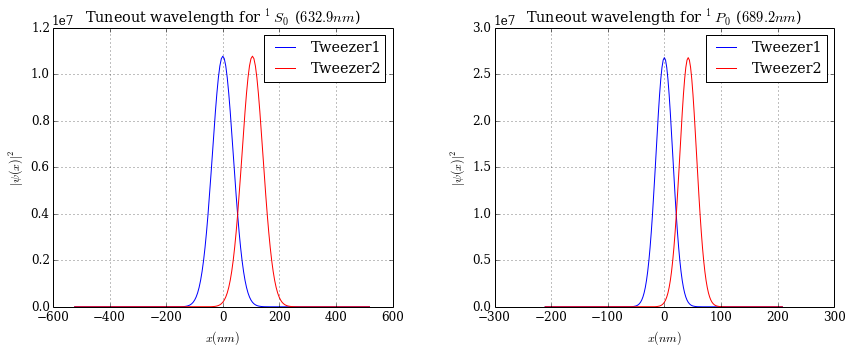

In [13]:
x1 = np.arange(-10 * tuneout_g.z0_r(), 10 * tuneout_g.z0_r(), 0.1 * tuneout_g.z0_r())
x01 = 2 * tuneout_g.z0_r()
y11 = []
y21 = []
for index, t in enumerate(x1):
    y11.append(HO_1d_g(t, tuneout_g.trap_omega_r()))
    y21.append(HO_1d_g(t - x01, tuneout_g.trap_omega_r()))
    
    
x2 = np.arange(-10 * tuneout_e.z0_r(), 10 * tuneout_e.z0_r(), 0.1 * tuneout_e.z0_r())
x02 = 2 * tuneout_e.z0_r()
y12 = []
y22 = []
for index, t in enumerate(x2):
    y12.append(HO_1d_e(t, tuneout_e.trap_omega_r()))
    y22.append(HO_1d_e(t - x02, tuneout_e.trap_omega_r()))
    
    
import matplotlib.gridspec as gridspec
figure = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.3,hspace=0.4)
ax1 = plt.subplot(gs[0,0]) 
ax1.plot(x1 * 1e9, np.abs(y11)**2 , markersize = 10, label = 'Tweezer1')
ax1.plot(x1 * 1e9, np.abs(y21)**2 ,color = 'r',linestyle = '-', markersize = 10, label = 'Tweezer2')
ax1.set_xlabel("$x (nm)$")
ax1.set_ylabel("$|\psi(x)|^2$")
ax1.legend(loc = 1)
ax1.set_title(r'Tuneout wavelength for $^1S_0$ ($632.9nm$)')
ax1.grid(1)

ax2 = plt.subplot(gs[0,1]) 
ax2.plot(x2 * 1e9, np.abs(y12)**2 , markersize = 10, label = 'Tweezer1')
ax2.plot(x2 * 1e9, np.abs(y22)**2 ,color = 'r',linestyle = '-', markersize = 10, label = 'Tweezer2')
ax2.set_xlabel("$x (nm)$")
ax2.set_ylabel("$|\psi(x)|^2$")
ax2.legend(loc = 1)
ax2.set_title(r'Tuneout wavelength for $^1P_0$ ($689.2nm$)')
ax2.grid(1)

# Parameters for the Kondo model

Assumptions:

1. one excited state atom per site in a deep lattice,  $J_e \ll U_{ee}$

2. one ground state atom per site in a shallow lattice,  $J_g \gg U_{gg}$

Then $J_{e} = 0, U_{gg} = 0, n_{je} = 1$

Hamiltonian

$H = - \sum_{\langle i, j \rangle m} J_g (c_{i g m}^+ c_{jgm} + h.c) + V_{ex} \sum_{j, m, m^{'}} c_{jgm}^+ c_{jem}^+ c_{jgm^{'}} c_{jem}$

where

$J_g = -\int d^3r \ w_g(r)(-\frac{\hbar^2}{2M} \nabla^2 + V_g(r))w_g(r-r_0)$

$V_{ex} = \frac{1}{2}(U_{eg}^+ - U_{eg}^-)$

$U_{eg}^{\pm} = g_{eg}^{\pm} \int d^3 r \ w_g^2(r) w_e^2(r)$

And 

$V_g = \frac{1}{2 \epsilon_0 c} Re(\alpha_g) I$

at tuneout wavelength for $^1 S_0 (632.9 nm)$

s-wave scattering lengths

$a_{eg}^+ = (169 \pm 8) a_0, \ a_{eg}^- = (68 \pm 22) a_0$ (Zhang, 2014)

The corresponding $g_{eg}^{\pm} = \frac{4 \pi \hbar^2 a_{eg}^{\pm}}{M}$ are

In [14]:
a_0 = 5.29177211e-11
a_p = 169 * a_0
a_m = 68 * a_0
print(a_p, a_m)

8.9430948659e-09 3.5984050348e-09


In [15]:
g_p = 4 * pi * hbar**2 * a_p / M87
g_m = 4 * pi * hbar**2 * a_m / M87
print(g_p, g_m)
print(0.5 * (g_p - g_m))                          # Ferromagnetic spin exchange

8.66037614624e-51 3.4846483902e-51
2.58786387802e-51


# $J_g$ and $J_e$

In [16]:
# As a function fo laser power and separation
# Fix the beam waist to be 632.9 / 515.2 * 500 nm = 614 nm
# Output in frequency
def J_g(P, r_0):
    tuneout_g = ODT(P, 632.9e-9, 614e-9, 0.0669e-37, M87)
    _step = 0.1 * tuneout_g.z0_r()
    _us = np.arange(-10 * (tuneout_g.z0_r() + r_0), 10 * (tuneout_g.z0_r() + r_0), _step)
    return 1 / h * sum([HO_1d_g(u, tuneout_g.trap_omega_r()) * HO_1d_g(u - r_0, tuneout_g.trap_omega_r())for u in _us]) * _step * 0.5 * hbar * tuneout_g.trap_freq_r()

# Tested the correctness by renormalization of wavefunctions
print(J_g (10e-3, 50e-9))
print(J_g (10e-3, 0))

# 689.2 / 515.2 * 500 nm = 668.9 nm
def J_e(P, r_0):
    tuneout_e = ODT(P, 689.2e-9, 668.9e-9, 0.2553e-37, M87)
    _step = 0.1 * tuneout_e.z0_r()
    _us = np.arange(-10 * (tuneout_e.z0_r() + r_0), 10 * (tuneout_e.z0_r() + r_0), _step)
    return 1 / h *sum([HO_1d_e(u, tuneout_e.trap_omega_r()) * HO_1d_e(u - r_0, tuneout_e.trap_omega_r())for u in _us]) * _step * 0.5 * hbar * tuneout_e.trap_freq_r()

# Tested the correctness by renormalization of wavefunctions
print(J_e (100e-3, 50e-9))
print(J_e (100e-3, 0))

5434.84521923285
15841.6473698531
314.689548012942
82456.9071005880


# $V_{ex}$

NOTE: NEED TO CALCULATE 3D OTHERWISE THERE IS THE UNIT PROBLEM

ALSO TRUE FOR U PARAMETERS

In the true case, the radial direction should be a thermal state but I just assume it's also in the ground state for now. I hope the basic physics doesn't change

In [17]:
# 689.2 / 515.2 * 500 nm = 668.9 nm
def V_ex(P1, P2):
    tuneout_g = ODT(P1, 632.9e-9, 614e-9, 0.0669e-37, M87)
    tuneout_e = ODT(P2, 689.2e-9, 668.9e-9, 0.2553e-37, M87)
    _step = 0.1 * min(tuneout_g.z0_r(), tuneout_e.z0_r())
    _us = np.arange(-10 * max(tuneout_g.z0_r(), tuneout_e.z0_r()), 10 * max(tuneout_g.z0_r(), tuneout_e.z0_r()), _step)
    I1 = sum([abs(HO_1d_g(u, tuneout_g.trap_omega_r()) * HO_1d_e(u, tuneout_e.trap_omega_r()))**2 for u in _us]) * _step
    
    _step2 = 0.1 * min(tuneout_g.z0_l(), tuneout_e.z0_l())
    _us2 = np.arange(-10 * max(tuneout_g.z0_l(), tuneout_e.z0_l()), 10 * max(tuneout_g.z0_l(), tuneout_e.z0_l()), _step2)
    I2 =  sum([abs(HO_1d_g(u, tuneout_g.trap_omega_l()) * HO_1d_e(u, tuneout_e.trap_omega_l()))**2 for u in _us2]) * _step2
    return 0.5 * (g_p - g_m) * I1**2 * I2 / h

print(V_ex(10e-3, 100e-3))

18380.5063810337


# Other parameters, $U_{gg}$ and $U_{ee}$

s-wave scattering lengths

$a_{gg} = (96.2 \pm 0.1) a_0, \ a_{ee} = (176 \pm 11) a_0$ (Zhang, 2014)

$U_{gg} = g_{gg}\int d^3 r \ w_g^4(r)$

$U_{ee} = g_{ee}\int d^3 r \ w_e^4(r)$

In [18]:
a_0 = 5.29177211e-11
a_g = 96.2 * a_0
a_e = 176 * a_0
print(a_g, a_e)

5.09068476982e-09 9.3135189136e-09


In [19]:
g_g = 4 * pi * hbar**2 * a_g / M87
g_e = 4 * pi * hbar**2 * a_e / M87
print(g_g, g_e)

4.92975257555e-51 9.01908995111e-51


In [20]:
def U_gg(P):
    tuneout_g = ODT(P, 632.9e-9, 614e-9, 0.0669e-37, M87)
    _step = 0.1 * tuneout_g.z0_r()
    _us = np.arange(-10 * (tuneout_g.z0_r()), 10 * (tuneout_g.z0_r()), _step)
    I1 = sum([abs(HO_1d_g(u, tuneout_g.trap_omega_r()))**4 for u in _us]) * _step

    _step2 = 0.1 * tuneout_g.z0_l()
    _us2 = np.arange(-10 * (tuneout_g.z0_l()), 10 * (tuneout_g.z0_l()), _step2)
    I2 = sum([abs(HO_1d_g(u, tuneout_g.trap_omega_l()))**4 for u in _us2]) * _step2
    return g_g * I1**2 * I2 / h

print(U_gg (10e-3))

# 689.2 / 515.2 * 500 nm = 668.9 nm
def U_ee(P):
    tuneout_e = ODT(P, 689.2e-9, 668.9e-9, 0.2553e-37, M87)
    _step = 0.1 * tuneout_e.z0_r()
    _us = np.arange(-10 * (tuneout_e.z0_r()), 10 * (tuneout_e.z0_r()), _step)
    I1 = sum([abs(HO_1d_e(u, tuneout_e.trap_omega_r()))**4 for u in _us]) * _step
    
    _step2 = 0.1 * tuneout_e.z0_l()
    _us2 = np.arange(-10 * (tuneout_e.z0_l()), 10 * (tuneout_e.z0_l()), _step2)
    I2 = sum([abs(HO_1d_e(u, tuneout_e.trap_omega_l()))**4 for u in _us2]) * _step2
    return g_e * I1**2 * I2 / h

print(U_ee (100e-3))

16113.5425021577
350007.497291879


# Kondo model valid regime

In [21]:
# P1: 633 laser power, on the order of mW
# P2: 689 laser power, on the order of 10 mW
P1 = np.arange(0.0001, 0.001, 0.0002)
P2 = np.arange(0.001, 0.04, 0.008)
r = np.arange(0, 50e-9, 10e-9)
Jg = np.empty([len(r), len(P1)])
Je = np.empty([len(r), len(P2)])
Ugg = []
Uee = []
Vex = np.empty([len(P1), len(P2)])
Jg1 = np.empty([len(P1), len(P2)])
Jg2 = np.empty([len(P1), len(P2)])

for i in range(len(P1)):
    for j in range(len(P2)):
        Vex[i][j]= V_ex(P1[i], P2[j])
        print(i,j)
    
for i in range(len(r)):
    for j in range(len(P1)):
        Jg[i][j] = J_g(P1[j], r[i])
        print(i,j)
        
for i in range(len(r)):
    for j in range(len(P2)):
        Je[i][j] = J_e(P2[j], r[i])
        print(i,j)

for _P1 in P1:
    Ugg.append(U_gg(_P1))
    
for _P2 in P2:
    Uee.append(U_ee(_P2))

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4
4 0
4 1
4 2
4 3
4 4
0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4
4 0
4 1
4 2
4 3
4 4
0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4
4 0
4 1
4 2
4 3
4 4


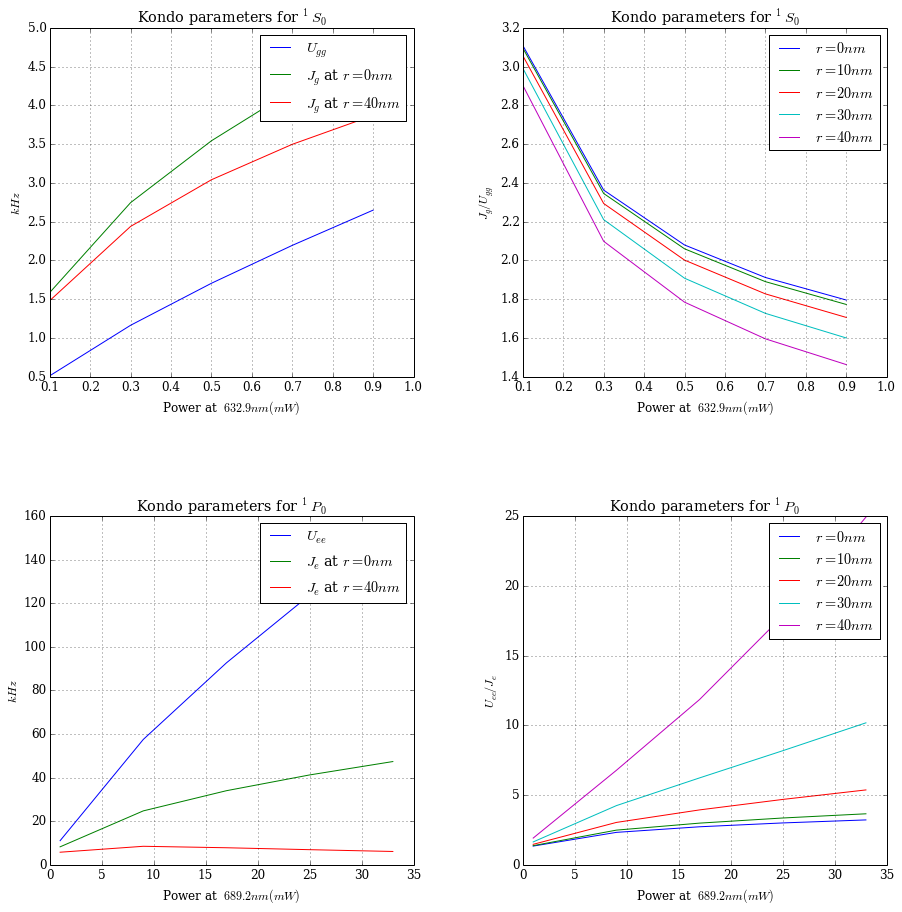

In [22]:
import matplotlib.gridspec as gridspec
figure = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)
ax1 = plt.subplot(gs[0,0])
#for i in range(len(r)):
ax1.plot(np.multiply(1000, P1), np.multiply(0.001, Ugg), markersize = 10, label = r'$U_{gg}$')
ax1.plot(np.multiply(1000, P1), np.multiply(0.001, Jg[0]),  markersize = 10, label = r'$J_{g}$ at $r = %d nm$' % (1e9*r[0]))
ax1.plot(np.multiply(1000, P1), np.multiply(0.001, Jg[len(r) - 1]),  markersize = 10, label = r'$J_{g}$ at $r = %d nm$' % (1e9*r[len(r)-1]))
#ax1.plot(x1 * 1e9, np.abs(y21)**2 ,color = 'r',linestyle = '-', markersize = 10, label = 'Tweezer2')
ax1.set_xlabel("Power at $\ 632.9 nm(mW)$")
ax1.set_ylabel("$kHz$")
ax1.legend(loc = 1)
ax1.set_title(r'Kondo parameters for $^1S_0$')
ax1.grid(1)

ax2 = plt.subplot(gs[0,1]) 
for i in range(len(r)): 
    ax2.plot(np.multiply(1000, P1), np.divide(Jg[i], Ugg),  markersize = 10, label = '$r = %d nm$' % (1e9*r[i]))
ax2.set_xlabel("Power at $\ 632.9 nm(mW)$")
ax2.set_ylabel(r'$J_{g} / U_{gg}$')
ax2.legend(loc = 1)
ax2.set_title(r'Kondo parameters for $^1S_0$')
ax2.grid(1)

ax3 = plt.subplot(gs[1,0])
#for i in range(len(r)):
ax3.plot(np.multiply(1000, P2), np.multiply(0.001, Uee), markersize = 10, label = r'$U_{ee}$')
ax3.plot(np.multiply(1000, P2), np.multiply(0.001, Je[0]),  markersize = 10, label = r'$J_{e}$ at $r = %d nm$' % (1e9*r[0]))
ax3.plot(np.multiply(1000, P2), np.multiply(0.001, Je[len(r) - 1]),  markersize = 10, label = r'$J_{e}$ at $r = %d nm$' % (1e9*r[len(r)-1]))
#ax1.plot(x1 * 1e9, np.abs(y21)**2 ,color = 'r',linestyle = '-', markersize = 10, label = 'Tweezer2')
ax3.set_xlabel("Power at $\ 689.2 nm (mW)$")
ax3.set_ylabel("$kHz$")
ax3.legend(loc = 1)
ax3.set_title(r'Kondo parameters for $^1P_0$')
ax3.grid(1)

ax4 = plt.subplot(gs[1,1]) 
for i in range(len(r)): 
    ax4.plot(np.multiply(1000, P2), np.divide(Uee, Je[i]),  markersize = 10, label = '$r = %d nm$' % (1e9*r[i]))
#ax1.plot(x1 * 1e9, np.abs(y21)**2 ,color = 'r',linestyle = '-', markersize = 10, label = 'Tweezer2')
ax4.set_xlabel("Power at $\ 689.2 nm (mW)$")
ax4.set_ylabel(r'$U_{ee}  /J_{e}$')
ax4.legend(loc = 1)
ax4.set_title(r'Kondo parameters for $^1P_0$')
ax4.grid(1)

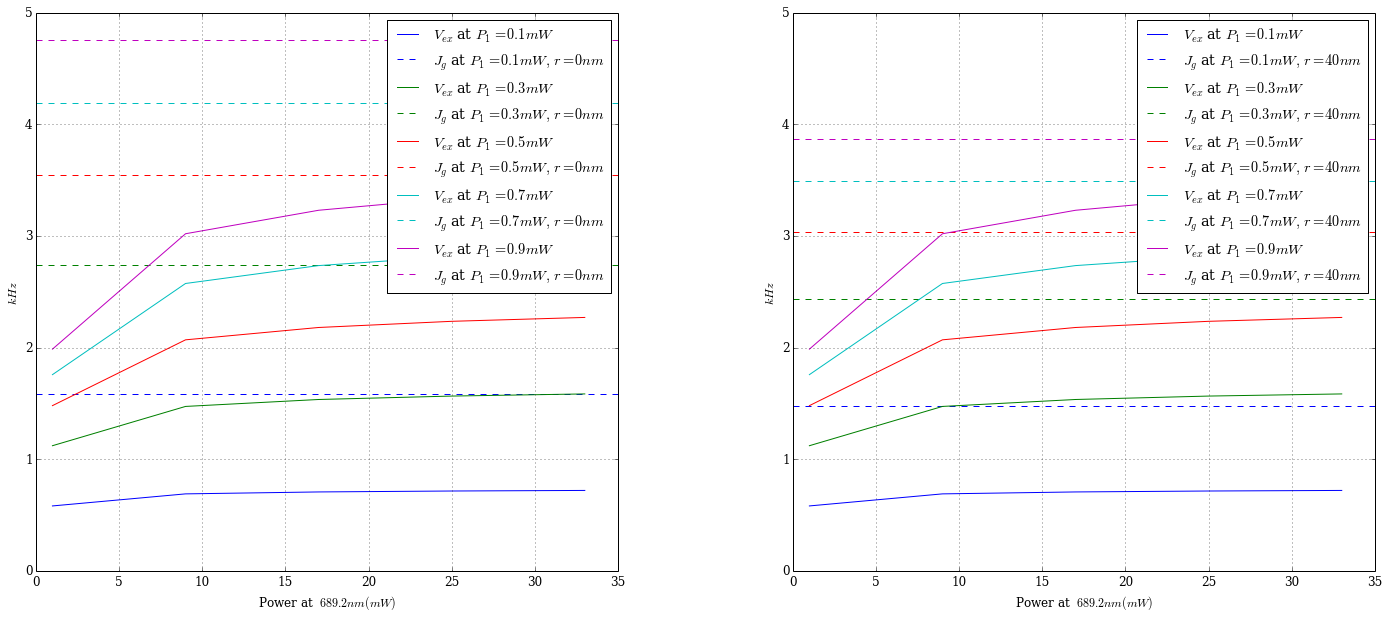

In [23]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

import matplotlib.gridspec as gridspec
figure = plt.figure(figsize=(24, 10))
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.3,hspace=0.4)
ax1 = plt.subplot(gs[0,0])
for i in range(len(P1)):
    ax1.plot(np.multiply(1000, P2), np.multiply(0.001, Vex[i]), color = colors[i], markersize = 10, label = r'$V_{ex}$ at $P_1 = %.1f mW$' % (1000*P1[i]))
    ax1.axhline(np.multiply(0.001, Jg[0][i]), color = colors[i], linestyle = '--', label = r'$J_{g}$ at $P_1 = %.1f mW, \ r = %d nm$' % (1000*P1[i], 1e9*r[0])) 
ax1.set_xlabel("Power at $\ 689.2 nm(mW)$")
ax1.set_ylabel("$kHz$")
ax1.legend(loc = 1)
ax1.set_ylim(0,5)
ax1.set_title(r'Kondo parameters at $r = %d \ nm$' % 1e9*r[0])
ax1.grid(1)

ax2 = plt.subplot(gs[0,1])
for i in range(len(P1)):
    ax2.plot(np.multiply(1000, P2), np.multiply(0.001, Vex[i]), color = colors[i], markersize = 10, label = r'$V_{ex}$ at $P_1 = %.1f mW$' % (1000*P1[i]))
    ax2.axhline(np.multiply(0.001, Jg[len(r)-1][i]), color = colors[i], linestyle = '--', label = r'$J_{g}$ at $P_1 = %.1f mW, \ r = %d nm$' % (1000*P1[i], 1e9*r[len(r)-1])) 
ax2.set_xlabel("Power at $\ 689.2 nm(mW)$")
ax2.set_ylabel("$kHz$")
ax2.legend(loc = 1)
ax2.set_ylim(0,5)
ax2.set_title(r'Kondo parameters at $r = %d \ nm$' % 1e9*r[len(r)-1])
ax2.grid(1)